# Dependencies

In [560]:
import tensorflow as tf
import os

# Remove dodgy images

In [561]:
import cv2
import filetype

In [562]:
data_dir = 'data'
images_ext = ['jpg', 'jpeg', 'png', 'bmp']

In [563]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            tip = filetype.guess(image_path)  # Pass path, not img array
            if tip is None or tip.extension not in images_ext:
                print(f"Invalid image file: {image_path} with type {tip.extension if tip else 'Unknown'}")
        except Exception as e:
            print(f"Error reading image {image_path}: {e}")

Invalid image file: data\Buses\658c0699a20f4848b5f8894d_type-b-school-bus.webp with type webp
Invalid image file: data\Buses\Kinglong-Luxury-Bus-48-Seater-Bus-Kinglong-Used-Passenger-Bus-Diesel-Buses-for-Ghana.webp with type webp
Invalid image file: data\Buses\test1-scaled-1920x1200-c-default.webp with type webp
Invalid image file: data\Buses\used-bus-3-mp4.webp with type webp
Invalid image file: data\Cars\-1x-1.webp with type webp
Invalid image file: data\Cars\0df5aac8-6a1c-41e6-b81e-7dbe2689b102.webp with type webp
Invalid image file: data\Cars\1440x1920-future-with-audi.jpg with type webp
Invalid image file: data\Cars\4d209a76bb324d85857fe6a62437bfa4.webp with type webp
Invalid image file: data\Cars\Aston-Martin-DB11.webp with type webp
Invalid image file: data\Cars\camry-exterior-right-front-three-quarter-14.jpeg with type webp
Invalid image file: data\Cars\cb1470bcb6c34fd2b4937a7a6840f3c2.webp with type webp
Invalid image file: data\Cars\fiVhSmYEza.webp with type webp
Invalid imag

# Load data

In [564]:
import numpy as np
from matplotlib import pyplot as plt

In [565]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    'data',
    image_size=(224, 224),  # Resize images to a common size
    batch_size=32,          # Set batch size
    shuffle=True,           # Shuffle the dataset
    seed=42                 # Set seed for reproducibility
)

Found 732 files belonging to 4 classes.


In [566]:
data_iterator = data.as_numpy_iterator()

In [567]:
batch = data_iterator.next()

In [568]:
batch

(array([[[[ 25.390625,  21.390625,   9.390625],
          [ 52.196426,  48.196426,  36.196426],
          [ 78.24553 ,  74.24553 ,  62.245533],
          ...,
          [109.29236 ,  93.86157 ,  63.138428],
          [141.94846 , 123.97302 ,  90.97302 ],
          [194.3317  , 175.3317  , 142.3317  ]],
 
         [[ 34.997932,  29.712208,  17.712208],
          [ 41.08479 ,  36.589283,  24.589283],
          [ 79.23816 ,  74.613106,  62.613106],
          ...,
          [167.4068  , 150.62555 , 118.77527 ],
          [178.25992 , 159.06354 , 129.67294 ],
          [159.34146 , 139.61601 , 110.96869 ]],
 
         [[ 59.6027  ,  52.745556,  41.22622 ],
          [ 51.77517 ,  46.007317,  34.19256 ],
          [ 77.244415,  71.29799 ,  59.531662],
          ...,
          [161.24419 , 142.17444 , 107.66967 ],
          [118.393166,  98.90661 ,  76.451416],
          [ 77.261185,  59.245552,  46.026005]],
 
         ...,
 
         [[  8.      ,   5.      ,   0.      ],
          [  8.   

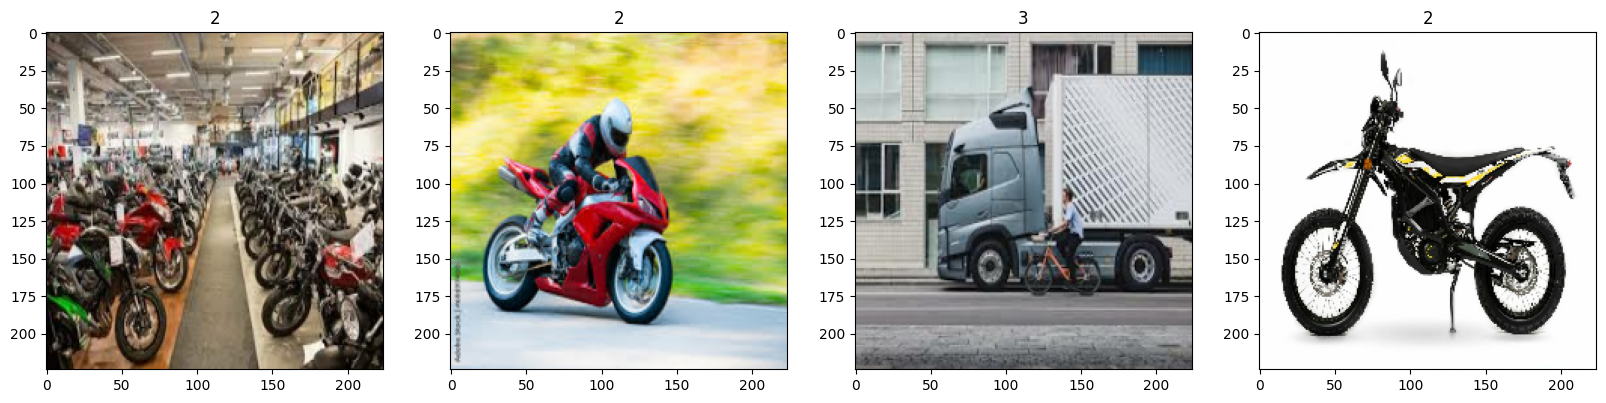

In [569]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

bus 0
car 1
bike 2
truck 3

# Scale data

In [570]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [571]:
data.as_numpy_iterator().next()

(array([[[[106.08475  , 129.07582  , 111.07806  ],
          [109.948944 , 128.91321  , 109.92433  ],
          [ 97.50035  , 110.43339  ,  92.43339  ],
          ...,
          [245.       , 249.       , 252.       ],
          [245.       , 249.       , 252.       ],
          [244.00224  , 248.00224  , 251.00224  ]],
 
         [[139.83453  , 162.83675  , 146.84792  ],
          [128.76727  , 149.71365  , 132.72046  ],
          [134.55945  , 147.48578  , 129.51256  ],
          ...,
          [245.       , 249.       , 252.       ],
          [245.       , 249.       , 252.       ],
          [244.00224  , 248.00224  , 251.00224  ]],
 
         [[118.63247  , 142.60349  , 128.61246  ],
          [ 89.324844 , 110.25365  ,  95.29367  ],
          [131.34074  , 143.29611  , 129.30727  ],
          ...,
          [245.       , 249.       , 252.       ],
          [245.       , 249.       , 252.       ],
          [244.00224  , 248.00224  , 251.00224  ]],
 
         ...,
 
         [[1

In [572]:
data = data.map(lambda x,y: (x/255, y))

In [573]:
data.as_numpy_iterator().next()

(array([[[[6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          ...,
          [1.69362739e-01, 2.05208331e-01, 1.21200979e-01],
          [2.49264702e-01, 2.88480401e-01, 1.94362745e-01],
          [1.95955887e-01, 2.35171571e-01, 1.37806371e-01]],
 
         [[6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          ...,
          [1.52359068e-01, 1.88204661e-01, 1.04197301e-01],
          [2.25520834e-01, 2.64736533e-01, 1.70618877e-01],
          [1.81135103e-01, 2.20350802e-01, 1.22985601e-01]],
 
         [[6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          ...,
          [1.51325062e-01, 1.87170655e-01, 1.0316

# Split data

In [574]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))+1

In [575]:
len(data)

23

In [576]:
train_size

16

In [577]:
val_size

4

In [578]:
test_size

3

In [579]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building the model

In [580]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [581]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [582]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

C:\Users\User\Documents\vehicle\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [583]:
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [584]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,576,932 (21.27 MB)

 Trainable params: 5,576,932 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [585]:
logdir = 'logs'

In [586]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [587]:
hist = model.fit(train, epochs=35, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 442ms/step - accuracy: 0.3105 - loss: 1.5818 - val_accuracy: 0.3516 - val_loss: 1.3802
Epoch 2/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.3711 - loss: 1.3563 - val_accuracy: 0.3672 - val_loss: 1.3418
Epoch 3/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.3770 - loss: 1.3437 - val_accuracy: 0.4219 - val_loss: 1.3150
Epoch 4/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.3691 - loss: 1.3212 - val_accuracy: 0.3594 - val_loss: 1.2508
Epoch 5/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 419ms/step - accuracy: 0.4336 - loss: 1.2593 - val_accuracy: 0.5391 - val_loss: 1.2093
Epoch 6/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 489ms/step - accuracy: 0.5254 - loss: 1.1881 - val_accuracy: 0.5938 - val_loss: 1.0961
Epoch 7/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 498ms/step - accuracy: 0.5195 - loss: 1.0821 - val_accuracy: 0.6641 - val_loss: 1.0655
Epoch 8/35
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step - accuracy: 0.5957 - loss: 1.0116 - val_accuracy: 0.

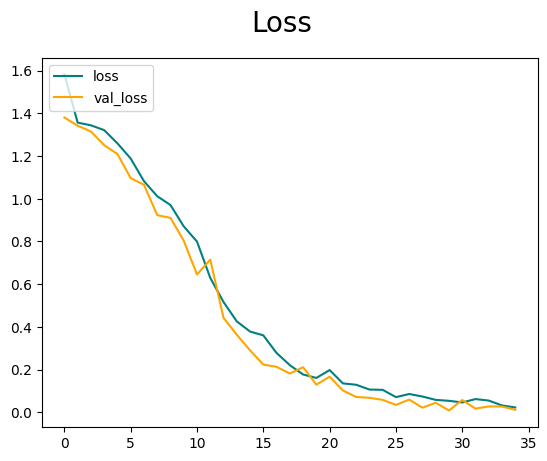

In [598]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

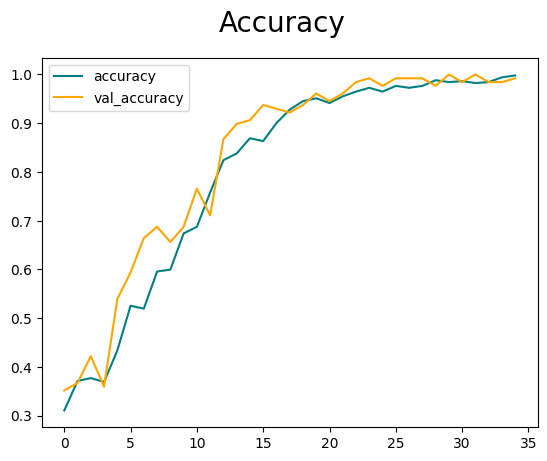

In [599]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [600]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [601]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [627]:
imp = cv2.imread('dad.jpg')

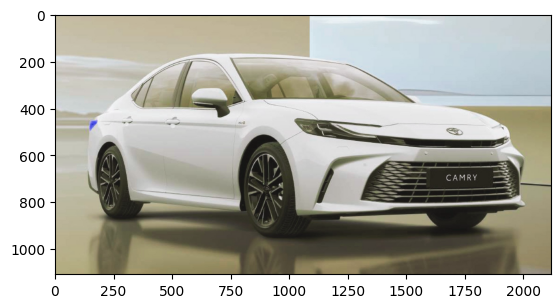

In [628]:
plt.imshow(imp)

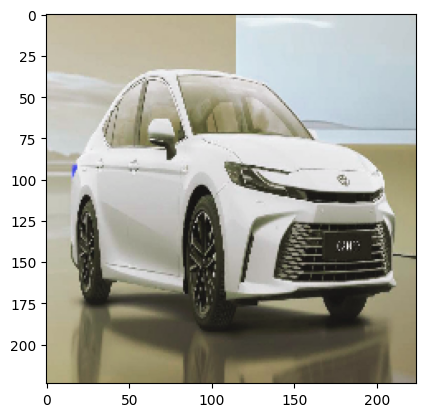

In [629]:
resize = tf.image.resize(imp, (224, 224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [630]:
pred = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [631]:
pred

array([[1.0083588e-04, 9.9241346e-01, 3.1075367e-06, 7.4825473e-03]],
      dtype=float32)

In [632]:
predicted_class = np.argmax(pred)
print(f"Predicted class: {predicted_class}")

if predicted_class == 0:
    print('Bus')
elif predicted_class == 1:
    print('Car')
elif predicted_class == 2:
    print('Bike')
else:
    print('Truck')

Predicted class: 1
Car


In [633]:
model.save('vehicle_classification_model.h5')